# Projet Commodities
Kylian Yamami, Mathis Rais, Tommy Ribeiro

Notre objectif est la création d’une stratégie d’investissement sur les matières premières. La stratégie se présente sous la forme d’un indice qui investit sur des mono indices commodity en prenant des expositions long et/ou short.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Liste commo avec leurs noms de fichiers associés
tickers_files = {
    "Aluminum": r"Data\Data daily\Bloomberg Aluminum - Données Historiques.csv",
    "Brent Crude": r"Data\Data Daily\Bloomberg Brent Crude - Données Historiques.csv",
    "Coffee": r"Data\Data daily\Bloomberg Coffee - Données Historiques.csv",
    "Copper": r"Data\Data daily\Bloomberg Copper - Données Historiques.csv",
    "Corn": r"Data\Data daily\Bloomberg Corn - Données Historiques.csv",
    "Cotton": r"Data\Data daily\Bloomberg Cotton - Données Historiques.csv",
    "Gold": r"Data\Data daily\Bloomberg Gold - Données Historiques.csv",
    "Lean Hogs": r"Data\Data daily\Bloomberg Lean Hogs - Données Historiques.csv",
    "Petroleum": r"Data\Data Daily\Bloomberg Petroleum - Données Historiques.csv",
    "Silver": r"Data\Data daily\Bloomberg Silver - Données Historiques.csv",
    "Soybeans": r"Data\Data daily\Bloomberg Soybeans - Données Historiques.csv",
    "Sugar": r"Data\Data daily\Bloomberg Sugar - Données Historiques.csv",
    "Wheat": r"Data\Data daily\Bloomberg Wheat - Données Historiques.csv",
    "WTI Crude Oil": r"Data\Data daily\Bloomberg WTI Crude Oil - Données Historiques.csv",   
}

# Dictionnaire pour stocker les DataFrames
dataframes = {}

# Importation des fichiers
for ticker, file in tickers_files.items():
    df = pd.read_csv(file)
    dataframes[ticker] = df

# On vérifie la bonne importation
for ticker, df in dataframes.items():
    print(f"DataFrame pour {ticker}:")
    print(df.head())
    print("\n")

DataFrame pour Aluminum:
         Date  Dernier     Ouv.  Plus Haut Plus Bas  Vol. Variation %
0  08/11/2024  32,1511  33,1828    33,2290  32,0999   NaN      -2,77%
1  07/11/2024  33,0657  32,3429    33,4966  32,3091   NaN       3,03%
2  06/11/2024  32,0945  32,2537    32,5237  31,5357   NaN      -1,74%
3  05/11/2024  32,6630  32,3368    32,6997  32,2507   NaN       1,53%
4  04/11/2024  32,1718  32,0076    32,3060  31,8784   NaN       0,73%


DataFrame pour Brent Crude:
         Date Dernier    Ouv.  Plus Haut Plus Bas  Vol. Variation %
0  12/11/2024  456,15  455,30     462,00   454,41   NaN       0,00%
1  11/11/2024  456,15  467,52     470,18   454,77   NaN      -2,69%
2  08/11/2024  468,78  477,60     477,84   465,97   NaN      -2,28%
3  07/11/2024  479,72  479,15     482,45   469,95   NaN       0,95%
4  06/11/2024  475,22  477,12     481,88   465,26   NaN      -0,81%


DataFrame pour Coffee:
         Date  Dernier     Ouv.  Plus Haut Plus Bas  Vol. Variation %
0  31/10/2024  17,0944

In [55]:
prix = pd.DataFrame()
rendements = pd.DataFrame()

for ticker, df in dataframes.items():
    df = df.rename(columns={"Dernier": "Prix"})
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

    df = df.sort_values('Date').reset_index()

    df["Prix"] = df["Prix"].str.replace(",", ".")
    df["Prix"] = pd.to_numeric(df["Prix"], errors='coerce')

    df["Rendements"] = df["Prix"].pct_change()

    df = df[["Date", "Prix", "Rendements"]]

    df.set_index('Date', inplace=True)

    dataframes[ticker] = df

    # Filter for dates greater than 2023
    df = df.loc[(df.index > '2023-01-01') & (df.index < '2024-10-31')]

    prix[ticker] = df['Prix']
    rendements[ticker] = df['Rendements']

    print(f"--- {ticker} ---")
    print(df.head())

--- Aluminum ---
               Prix  Rendements
Date                           
2023-01-03  32.1482   -0.029515
2023-01-04  31.5407   -0.018897
2023-01-05  31.3906   -0.004759
2023-01-06  31.9457    0.017684
2023-01-09  33.9253    0.061968
--- Brent Crude ---
              Prix  Rendements
Date                          
2023-01-03  465.61   -0.044354
2023-01-04  441.45   -0.051889
2023-01-05  446.27    0.010919
2023-01-06  445.59   -0.001524
2023-01-09  451.72    0.013757
--- Coffee ---
               Prix  Rendements
Date                           
2023-01-03  10.4708   -0.005981
2023-01-04  10.1560   -0.030065
2023-01-05  10.1088   -0.004647
2023-01-06   9.9671   -0.014017
2023-01-09   9.9514   -0.001575
--- Copper ---
              Prix  Rendements
Date                          
2023-01-03  337.73   -0.011561
2023-01-04  335.40   -0.006899
2023-01-05  342.62    0.021527
2023-01-06  350.69    0.023554
2023-01-09  361.04    0.029513
--- Corn ---
               Prix  Rendements
Date  

C:\Users\jqygn\AppData\Local\Temp\ipykernel_21744\1733465379.py:13: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["Rendements"] = df["Prix"].pct_change()


--- Soybeans ---
              Prix  Rendements
Date                          
2023-01-03  307.38   -0.020833
2023-01-04  305.58   -0.005856
2023-01-05  302.95   -0.008607
2023-01-06  307.43    0.014788
2023-01-09  306.61   -0.002667
--- Sugar ---
              Prix  Rendements
Date                          
2023-01-03  101.48   -0.016952
2023-01-04  100.66   -0.008080
2023-01-05   99.63   -0.010232
2023-01-06   97.67   -0.019673
2023-01-09   98.75    0.011058
--- Wheat ---
              Prix  Rendements
Date                          
2023-01-03  7.7548   -0.020834
2023-01-04  7.4548   -0.038686
2023-01-05  7.4673    0.001677
2023-01-06  7.4348   -0.004352
2023-01-09  7.4148   -0.002690
--- WTI Crude Oil ---
               Prix  Rendements
Date                           
2023-01-03  84.1204   -0.041392
2023-01-04  79.7355   -0.052126
2023-01-05  80.6299    0.011217
2023-01-06  80.7608    0.001623
2023-01-09  81.7207    0.011886


On a remarqué que certaines lignes de données étaient manquantes pour le ```Brent Crude``` ce qui a faussé nos courbes.  
De ce fait, nous avons décidé d'interpoler cette colonne afin de remplacer les valeurs manquantes.

In [56]:
prix["Brent Crude"] = prix["Brent Crude"].interpolate()

Ci-dessous, la matrice de corrélation des prix de nos commodities. Cette visualisation permet de se faire une idée des relations qui existent entre nos actifs.

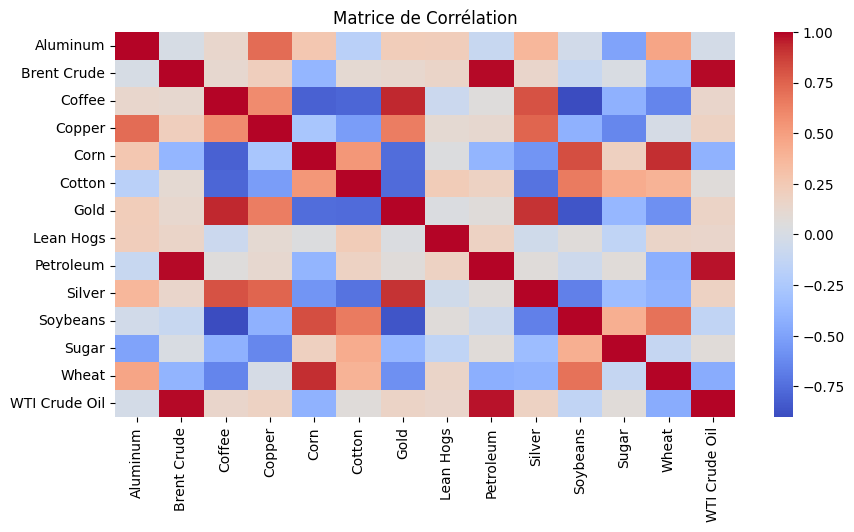

In [57]:
corr = prix.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

In [58]:
lookback = 20               # fenêtre de calcul des performances passées
rebalance_freq = 20         # fréquence de rebalancement (en jours ouvrés)
n_long_short = 6           # nombre de long et de short

index_values = []
weights_history = []
rebalance_dates = []
initial_index_value = 100
index_values.append(initial_index_value)

# Boucle principale pour construire l'indice
for i in range(lookback, len(prix)):
    today = prix.index[i]
    rebalance = ((i - lookback) % rebalance_freq == 0)

    if rebalance:
        perf = (prix.iloc[i - lookback:i].pct_change() + 1).prod() - 1
        ranked = perf.sort_values()
        longs = ranked.head(n_long_short).index.tolist()
        shorts = ranked.tail(n_long_short).index.tolist()

        weights = {c: 0 for c in prix.columns}
        for c in longs:
            weights[c] = 1 / n_long_short
        for c in shorts:
            weights[c] = -1 / n_long_short

        rebalance_UI = prix.loc[today].copy()
        rebalance_weights = weights.copy()
        rebalance_dates.append(today)

    curr_UI = prix.iloc[i]
    ER_t = index_values[-1] + sum(
        rebalance_weights[c] * ((curr_UI[c] / rebalance_UI[c]) - 1)
        for c in prix.columns
    ) * index_values[-1]

    index_values.append(ER_t)
    weights_history.append(rebalance_weights.copy())

In [59]:
# Série temporelle finale de l'indice
index_dates = prix.index[lookback:]
index_series = pd.Series(index=index_dates, data=index_values[1:])
nbr_years = round((index_dates[-1] - index_dates[0]).days / 365)

# Performances
returns = index_series.pct_change().dropna()
cumulative_return = index_series.iloc[-1] / index_series.iloc[0] - 1
volatility = returns.std() * np.sqrt(252)
sharpe_ratio = (cumulative_return / nbr_years) / volatility
max_drawdown = ((index_series / index_series.cummax()) - 1).min()

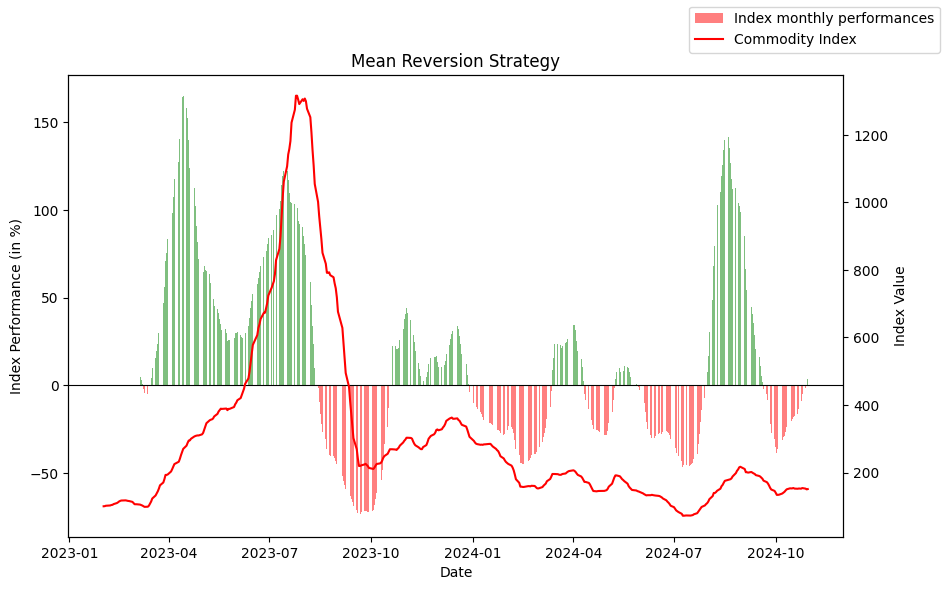

In [60]:
# Calcul des performances
perf = index_series.pct_change(22)*100

# Couleurs pour performences : vert si positif, rouge si négatif
colors = ['green' if val > 0 else 'red' for val in perf]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Performences en %
ax1.bar(index_series.index, perf, color=colors, alpha=0.5, label='Index monthly performances')
ax1.set_xlabel('Date')
ax1.set_ylabel('Index Performance (in %)')
ax1.axhline(0, color='black', linewidth=0.8)  # Ligne horizontale à 0

# Deuxième axe pour la courbe de l'index
ax2 = ax1.twinx()
ax2.plot(index_series, color='red', label='Commodity Index')
ax2.set_ylabel('Index Value')

fig.legend()

plt.title('Mean Reversion Strategy')

plt.show()

On remarque bien un pic en juillet 2023 que l'on peut bien interpréter avec de l'intuition financière puisque cette période correspond à la période des Barbecue, et grâce au plot des poids du portefeuille (cf dernier graphe), on voit bien que la pression acheteuse sur les lean hogs nous amène à short cet actif (puisque dans notre stratégie de retour à la moyenne on pense que le prix du lean hogs va revenir à une moyenne plus long terme).

Aussi, on en vient à se demander pourquoi on ne retrouve pas cette dynamique en juillet 2024, et après des recherches sur le contexte macro-économique, on trouve qu'en 2024, la Chine a beaucoup réduit ses importations de lean hogs ce qui pourrait être une raison de ce déclin.

Enfin, pour ce qui concerne le blé (wheat), sur les périodes de récolte, on s'attend bien à une pression acheteuse à nouveau, et c'est bien ce qu'on constate dans notre plot des poids du portefeuille (cf dernier graphe) puisqu'on short cet actif en s'attendant à un retour à la moyenne après la hausse des prix dûe aux récoltes.

In [61]:
# Affichage des indicateurs
metrics = pd.DataFrame({
    "Cumulative Return": [f"{cumulative_return:.2%}"],
    "Annualized Volatility": [f"{volatility:.2%}"],
    "Sharpe Ratio": [f"{sharpe_ratio:.2f}"],
    "Max Drawdown": [f"{max_drawdown:.2%}"]
})

print(metrics)

  Cumulative Return Annualized Volatility Sharpe Ratio Max Drawdown
0            50.92%                49.84%         0.51      -94.53%


In [62]:
# On récupère les poids historique sous forme de dataframe
weights_df = pd.DataFrame.from_dict(weights_history)
weights_df.index = index_dates
weights_df

,Aluminum,Brent Crude,Coffee,Copper,Corn,Cotton,Gold,Lean Hogs,Petroleum,Silver,Soybeans,Sugar,Wheat,WTI Crude Oil
Date,,,,,,,,,,,,,,
2023-02-01,-0.166667,0.000000,-0.166667,-0.166667,0.166667,0.000000,-0.166667,0.166667,-0.166667,0.166667,0.166667,-0.166667,0.166667,0.166667
2023-02-02,-0.166667,0.000000,-0.166667,-0.166667,0.166667,0.000000,-0.166667,0.166667,-0.166667,0.166667,0.166667,-0.166667,0.166667,0.166667
2023-02-03,-0.166667,0.000000,-0.166667,-0.166667,0.166667,0.000000,-0.166667,0.166667,-0.166667,0.166667,0.166667,-0.166667,0.166667,0.166667
2023-02-06,-0.166667,0.000000,-0.166667,-0.166667,0.166667,0.000000,-0.166667,0.166667,-0.166667,0.166667,0.166667,-0.166667,0.166667,0.166667
2023-02-07,-0.166667,0.000000,-0.166667,-0.166667,0.166667,0.000000,-0.166667,0.166667,-0.166667,0.166667,0.166667,-0.166667,0.166667,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-24,-0.166667,0.166667,0.000000,-0.166667,0.000000,-0.166667,0.166667,0.166667,0.166667,-0.166667,0.166667,-0.166667,-0.166667,0.166667
2024-10-25,-0.166667,0.166667,0.000000,-0.166667,0.000000,-0.166667,0.166667,0.166667,0.166667,-0.166667,0.166667,-0.166667,-0.166667,0.166667
2024-10-28,-0.166667,0.166667,0.000000,-0.166667,0.000000,-0.166667,0.166667,0.166667,0.166667,-0.166667,0.166667,-0.166667,-0.166667,0.166667


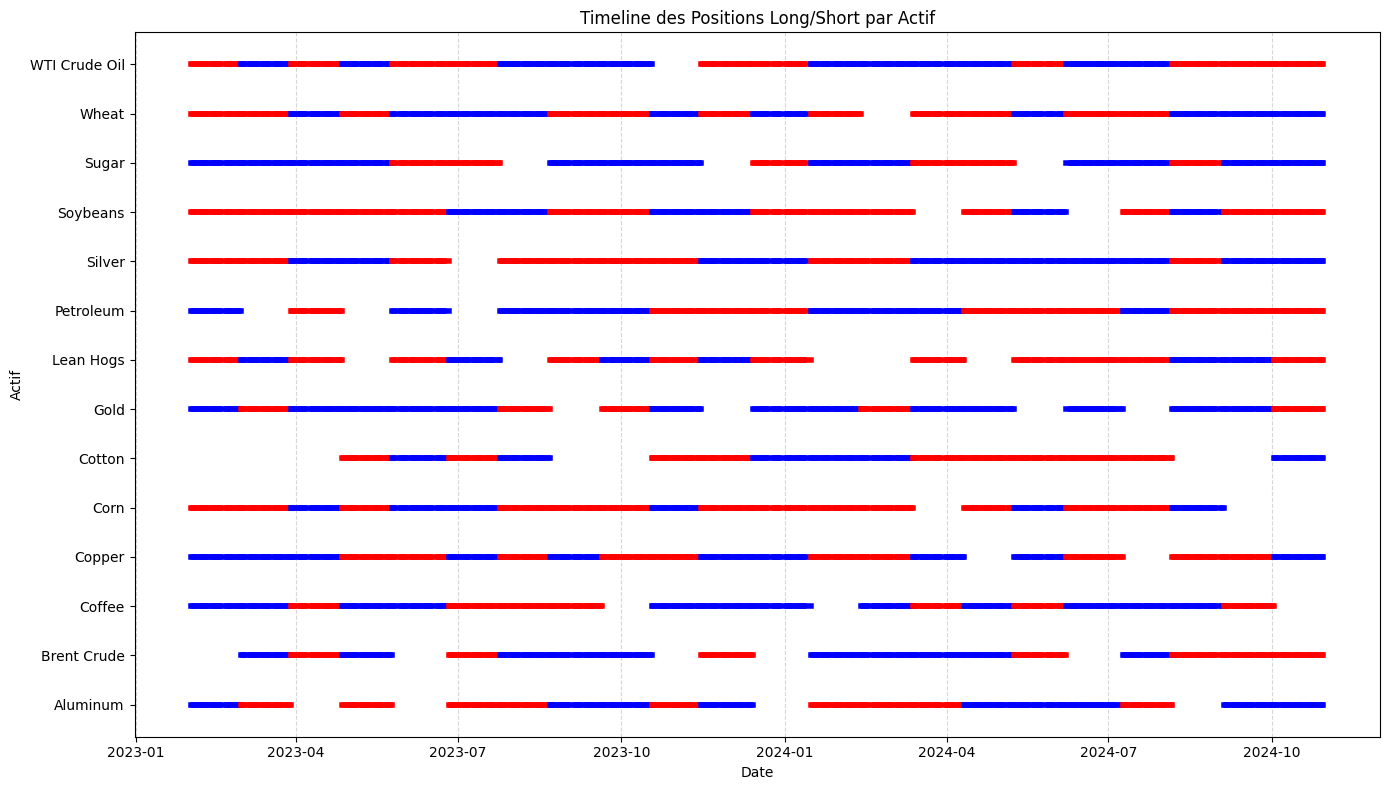

In [63]:
# Plot de la variation des poids au cours du temps
fig, ax = plt.subplots(figsize=(14, 8))

for i, ticker in enumerate(weights_df.columns):
    pos_series = weights_df[ticker]
    dates = pos_series.index

    # Couleurs : long (rouge), short (bleu)
    for j in range(1, len(dates)):
        val = pos_series.iloc[j]
        if val > 0:
            ax.plot(dates[j-1:j+1], [i, i], color='red', linewidth=4)
        elif val < 0:
            ax.plot(dates[j-1:j+1], [i, i], color='blue', linewidth=4)

ax.set_yticks(range(len(weights_df.columns)))
ax.set_yticklabels(weights_df.columns)
ax.set_title("Timeline des Positions Long/Short par Actif")
ax.set_xlabel("Date")
ax.set_ylabel("Actif")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

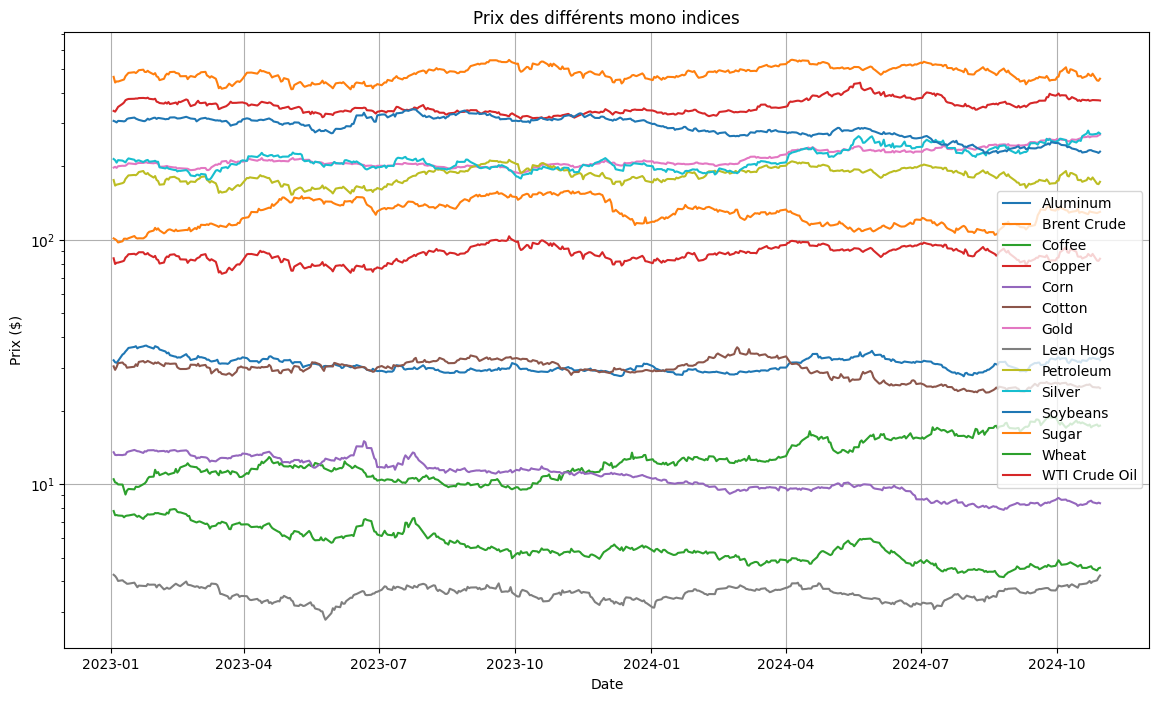

In [64]:
plt.figure(figsize=(14, 8))
for col in prix.columns:
    plt.plot(prix[col], label=col)
    
plt.title("Prix des différents mono indices")
plt.xlabel("Date")
plt.ylabel("Prix ($)")
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()